In [1]:
import locale
import sys
import pandas as pd
import numpy as np


Elementy etapu 1

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', sep=',', encoding='latin-1',  header=None)
df.columns = ["target","ids","date","flag","user","text"]
df = df.drop(["ids","date","flag","user"], axis = 1)

1.1 Konwersja tekstu do małych liter.

In [3]:
df['text'] = df['text'].str.lower()
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


1.2 Usuwanie znaków interpunkcyjnych i specjalnych

In [4]:
import string 
translator = str.maketrans('', '', string.punctuation)
df['text'] = df['text'].apply(lambda x: str(x).translate(translator))
df.head()

,target,text
0,0,switchfoot httptwitpiccom2y1zl awww thats a b...
1,0,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...


1.3 Usuwanie stop słów.

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) 

def remove_stop_words(sentence): 
    words = sentence.split() 
    filtered_words = [word for word in words if word not in stop_words] 
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Staś\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['text'] = df['text'].apply(lambda x: remove_stop_words(x))
df.head()

,target,text
0,0,switchfoot httptwitpiccom2y1zl awww thats bumm...
1,0,upset cant update facebook texting might cry r...
2,0,kenichan dived many times ball managed save 50...
3,0,whole body feels itchy like fire
4,0,nationwideclass behaving im mad cant see


1.4 Tokenizacja

In [7]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Staś\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Staś\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
df['text'] = df['text'].apply(word_tokenize)
df.head()

,target,text
0,0,"[switchfoot, httptwitpiccom2y1zl, awww, thats,..."
1,0,"[upset, cant, update, facebook, texting, might..."
2,0,"[kenichan, dived, many, times, ball, managed, ..."
3,0,"[whole, body, feels, itchy, like, fire]"
4,0,"[nationwideclass, behaving, im, mad, cant, see]"


Podział na zbiór testowy i treningowy (z etapu 1)

In [9]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state = 0)

2 Wykorzystanie metody Bag-of-Words (BoW) do przekształcenia tekstu na wektory cech.

In [10]:
BoW_train = pd.Series([y for x in train_df['text'].values.flatten() for y in x]).value_counts()

In [11]:
BoW_train

im                      124522
good                     62507
day                      57553
get                      57062
like                     54422
                         ...  
httptwitpiccom61djw          1
mrscottiebee                 1
httptinyurlcomkj4lyh         1
akmanning                    1
maeundead                    1
Name: count, Length: 660662, dtype: int64

In [12]:
BoW_test = pd.Series([y for x in test_df['text'].values.flatten() for y in x]).value_counts()

In [13]:
BoW_test

im                 52958
good               26891
day                24812
get                24422
like               23326
                   ...  
nshollingsworth        1
cazza                  1
hibbsy                 1
jenthefangirls         1
intrasite              1
Name: count, Length: 357847, dtype: int64

3.1 Naiwny klasyfikator Bayesa.

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

X = []

for i in range(0, len(df)):
    text = df['text'][i]
    text = ' '.join(text)
    X.append(text)

y= df['target']

X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size = 0.3, random_state = 0)
    
vectorizer = TfidfVectorizer(max_features = 1500)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


model = MultinomialNB()
batch_size = 10000
num_batches = X_train_vec.shape[0] // batch_size + 1

for i in range(num_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, X_train_vec.shape[0])
    if start >= end:
        break
    X_batch = X_train_vec[start:end]
    y_batch = y_train.iloc[start:end]
        
    # W przypadku pierwszej iteracji używamy `partial_fit` z initial classes
    if i == 0:
        model.partial_fit(X_batch, y_batch, classes=np.array([0, 4]))
    else:
        model.partial_fit(X_batch, y_batch)
    print(f"Przetworzono batch {i + 1}/{num_batches}")


Przetworzono batch 1/113
Przetworzono batch 2/113
Przetworzono batch 3/113
Przetworzono batch 4/113
Przetworzono batch 5/113
Przetworzono batch 6/113
Przetworzono batch 7/113
Przetworzono batch 8/113
Przetworzono batch 9/113
Przetworzono batch 10/113
Przetworzono batch 11/113
Przetworzono batch 12/113
Przetworzono batch 13/113
Przetworzono batch 14/113
Przetworzono batch 15/113
Przetworzono batch 16/113
Przetworzono batch 17/113
Przetworzono batch 18/113
Przetworzono batch 19/113
Przetworzono batch 20/113
Przetworzono batch 21/113
Przetworzono batch 22/113
Przetworzono batch 23/113
Przetworzono batch 24/113
Przetworzono batch 25/113
Przetworzono batch 26/113
Przetworzono batch 27/113
Przetworzono batch 28/113
Przetworzono batch 29/113
Przetworzono batch 30/113
Przetworzono batch 31/113
Przetworzono batch 32/113
Przetworzono batch 33/113
Przetworzono batch 34/113
Przetworzono batch 35/113
Przetworzono batch 36/113
Przetworzono batch 37/113
Przetworzono batch 38/113
Przetworzono batch 39

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
    
vectorizer
y_pred = model.predict(X_test_vec)
print("Dokładność modelu:", accuracy_score(y_test, y_pred))
print("AUC:\n", roc_auc_score(y_test, y_pred))
print("Gini:\n", 2*roc_auc_score(y_test, y_pred)-1)
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))

Dokładność modelu: 0.7408520833333333
AUC:
 0.7408597508154022
Gini:
 0.48171950163080446
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74    239877
           4       0.75      0.73      0.74    240123

    accuracy                           0.74    480000
   macro avg       0.74      0.74      0.74    480000
weighted avg       0.74      0.74      0.74    480000



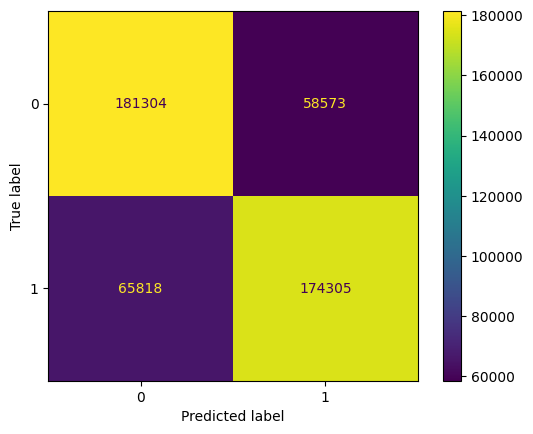

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

3.2 Regresja logistyczna

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train_vec, y_train)
clf.score(X_train_vec, y_train)

0.7574392857142858

In [18]:
y_pred = clf.predict(X_test_vec)
print("Dokładność modelu:", accuracy_score(y_test, y_pred))
print("AUC:\n", roc_auc_score(y_test, y_pred))
print("Gini:\n", 2*roc_auc_score(y_test, y_pred)-1)
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))

Dokładność modelu: 0.757125
AUC:
 0.7571108531307309
Gini:
 0.5142217062614618
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75    239877
           4       0.74      0.78      0.76    240123

    accuracy                           0.76    480000
   macro avg       0.76      0.76      0.76    480000
weighted avg       0.76      0.76      0.76    480000



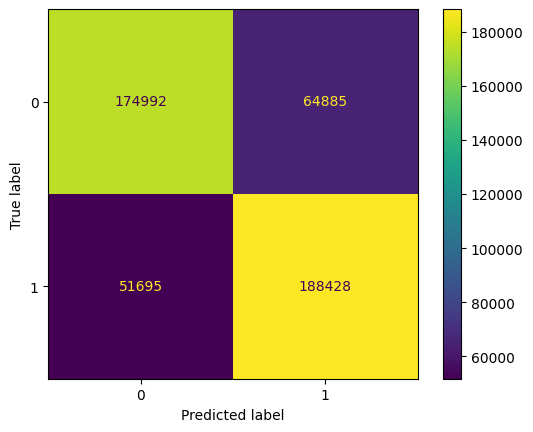

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

3.3 Drzewa decyzyjne.

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=20)
clf = clf.fit(X_train_vec, y_train)

[Text(0.9106055199016457, 0.9761904761904762, 'x[1071] <= 0.054\ngini = 0.5\nsamples = 1120000\nvalue = [560123, 559877]'),
 Text(0.8266269602783407, 0.9285714285714286, 'x[1273] <= 0.2\ngini = 0.5\nsamples = 1100578\nvalue = [541681, 558897]'),
 Text(0.8686162400899933, 0.9523809523809523, 'True  '),
 Text(0.7189727857991038, 0.8809523809523809, 'x[848] <= 0.165\ngini = 0.5\nsamples = 1073599\nvalue = [537913, 535686]'),
 Text(0.6082287429013613, 0.8333333333333334, 'x[786] <= 0.151\ngini = 0.5\nsamples = 1049705\nvalue = [517803, 531902]'),
 Text(0.48166861770527564, 0.7857142857142857, 'x[550] <= 0.192\ngini = 0.5\nsamples = 1010640\nvalue = [508209, 502431]'),
 Text(0.37681700113443567, 0.7380952380952381, 'x[1452] <= 0.111\ngini = 0.5\nsamples = 959781\nvalue = [492277, 467504]'),
 Text(0.30500361454097435, 0.6904761904761905, 'x[593] <= 0.067\ngini = 0.5\nsamples = 921579\nvalue = [464732, 456847]'),
 Text(0.26425513525704897, 0.6428571428571429, 'x[1272] <= 0.216\ngini = 0.5\nsa

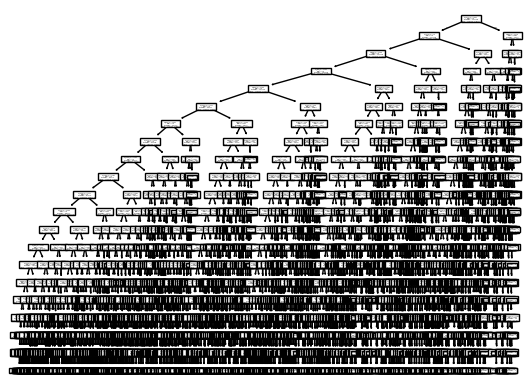

In [21]:
tree.plot_tree(clf)

In [22]:
y_pred = clf.predict(X_test_vec)
print("Dokładność modelu:", accuracy_score(y_test, y_pred))
print("AUC:\n", roc_auc_score(y_test, y_pred))
print("Gini:\n", 2*roc_auc_score(y_test, y_pred)-1)
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))

Dokładność modelu: 0.6240604166666667
AUC:
 0.6239096161914685
Gini:
 0.2478192323829369
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.80      0.33      0.47    239877
           4       0.58      0.92      0.71    240123

    accuracy                           0.62    480000
   macro avg       0.69      0.62      0.59    480000
weighted avg       0.69      0.62      0.59    480000



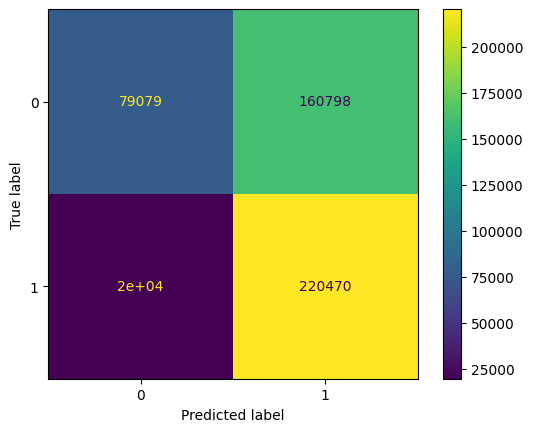

In [23]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()